# Data Manipulation with Pandas

## 1. Introducing DataFrames

- pandas is built on numpy and matplotlib
- numpy = multidimensional array objects for data manipulation that pandas uses to store data
matplotlib = data visulisation
- Pandas used for rectangular data i.e. tabular data = dataframe

### Inspecting a DataFrame

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains

- head() returns the first few rows (the “head” of the DataFrame).
- info() shows information on each of the columns, such as the data type and number of missing values.
- shape returns the number of rows and columns of the DataFrame.
- describe() calculates a few summary statistics for each column.

In [107]:
#import pandas and homelessness.csv
import pandas as pd
#if we set index_col=0 we're explicitly stating to treat the first column as the index
homelessness = pd.read_csv('homelessness.csv', index_col = 0)

# Print the head of the homelessness data
print(homelessness.head())

# Print information about homelessness
print(homelessness.info())

# Print the shape of homelessness - this gives (no: rows, no: cols)
print(homelessness.shape)

# Print a description of homelessness
print(homelessness.describe())


               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB
None
(51, 5)
         individuals  family_members     state_pop
count      51

### Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

- values: A two-dimensional NumPy array of values.
- columns: An index of columns: the column names.
- index: An index for the rows: either row numbers or row names.

In [2]:
# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

### Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values()

In [3]:
# Sort homelessness by the number of homeless individuals, from smallest to largest, and save this as homelessness_ind
homelessness_ind = homelessness.sort_values('individuals',
                                           ascending=True)

# Print the top few rows
print(homelessness_ind.head())

    Unnamed: 0              region         state  individuals  family_members  \
50          50            Mountain       Wyoming        434.0           205.0   
34          34  West North Central  North Dakota        467.0            75.0   
7            7      South Atlantic      Delaware        708.0           374.0   
39          39         New England  Rhode Island        747.0           354.0   
45          45         New England       Vermont        780.0           511.0   

    state_pop  
50     577601  
34     758080  
7      965479  
39    1058287  
45     624358  


In [4]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members',
                                           ascending = False)

# Print the top few rows
print(homelessness_fam.head())

    Unnamed: 0              region          state  individuals  \
32          32        Mid-Atlantic       New York      39827.0   
4            4             Pacific     California     109008.0   
21          21         New England  Massachusetts       6811.0   
9            9      South Atlantic        Florida      21443.0   
43          43  West South Central          Texas      19199.0   

    family_members  state_pop  
32         52070.0   19530351  
4          20964.0   39461588  
21         13257.0    6882635  
9           9587.0   21244317  
43          6111.0   28628666  


In [5]:
# Sort homelessness first by region (ascending), and then by number of family members (descending).
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'],
                                    ascending = [True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

    Unnamed: 0              region      state  individuals  family_members  \
13          13  East North Central   Illinois       6752.0          3891.0   
35          35  East North Central       Ohio       6929.0          3320.0   
22          22  East North Central   Michigan       5209.0          3142.0   
49          49  East North Central  Wisconsin       2740.0          2167.0   
14          14  East North Central    Indiana       3776.0          1482.0   

    state_pop  
13   12723071  
35   11676341  
22    9984072  
49    5807406  
14    6695497  


### Subsetting columns
When working with data, you may not need all of the variables in your dataset. Square brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. 

To select only "col_a" of the DataFrame df, use:

    df["col_a"]
To select "col_a" and "col_b" of df, use:

    df[["col_a", "col_b"]]


In [6]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [7]:
# Select the state and family_members columns
state_fam = homelessness[['state', 'family_members']]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [8]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals', 'state']]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


### Subsetting rows
There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.

    dogs[dogs["height_cm"] > 60]
    dogs[dogs["color"] == "tan"]

    dogs[(dogs["height_cm"] > 60) & (dogs["color"] == "tan")]


In [9]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals'] > 10000]

# See the result
print(ind_gt_10k)

    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop  
4    39461588  
9    21244317  
32   19530351  
37    4181886  
43   28628666  
47    7523869  


In [10]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region'] == 'Mountain']

# See the result
print(mountain_reg)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
5            5  Mountain    Colorado       7607.0          3250.0    5691287
12          12  Mountain       Idaho       1297.0           715.0    1750536
26          26  Mountain     Montana        983.0           422.0    1060665
28          28  Mountain      Nevada       7058.0           486.0    3027341
31          31  Mountain  New Mexico       1949.0           602.0    2092741
44          44  Mountain        Utah       1904.0           972.0    3153550
50          50  Mountain     Wyoming        434.0           205.0     577601


In [11]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000)
                            & (homelessness['region'] == 'Pacific')]

# See the result
print(fam_lt_1k_pac)

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


### Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the .isin() method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

    colors = ["brown", "black", "tan"]
    condition = dogs["color"].isin(colors)
    dogs[condition]

In [12]:
# Filter homelessness for cases where the USA census region is "South Atlantic" or it is "Mid-Atlantic", assigning to south_mid_atlantic.
south_mid_atlantic = homelessness[(homelessness['region'] == 'South Atlantic') 
                                  | (homelessness['region'] == 'Mid-Atlantic')]

# See the result
print(south_mid_atlantic)

    Unnamed: 0          region                 state  individuals  \
7            7  South Atlantic              Delaware        708.0   
8            8  South Atlantic  District of Columbia       3770.0   
9            9  South Atlantic               Florida      21443.0   
10          10  South Atlantic               Georgia       6943.0   
20          20  South Atlantic              Maryland       4914.0   
30          30    Mid-Atlantic            New Jersey       6048.0   
32          32    Mid-Atlantic              New York      39827.0   
33          33  South Atlantic        North Carolina       6451.0   
38          38    Mid-Atlantic          Pennsylvania       8163.0   
40          40  South Atlantic        South Carolina       3082.0   
46          46  South Atlantic              Virginia       3928.0   
48          48  South Atlantic         West Virginia       1021.0   

    family_members  state_pop  
7            374.0     965479  
8           3134.0     701547  
9     

In [13]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter homelessness for cases where the USA census state is in the list of Mojave states, canu, assigning to mojave_homelessness
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


### Adding new columns
You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

In [14]:
# Add a new column to homelessness, named total, containing the sum of the individuals and family_members columns.
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add another column to homelessness, named p_individuals, containing the proportion of homeless people in each state who are individuals.
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness)

    Unnamed: 0              region                 state  individuals  \
0            0  East South Central               Alabama       2570.0   
1            1             Pacific                Alaska       1434.0   
2            2            Mountain               Arizona       7259.0   
3            3  West South Central              Arkansas       2280.0   
4            4             Pacific            California     109008.0   
5            5            Mountain              Colorado       7607.0   
6            6         New England           Connecticut       2280.0   
7            7      South Atlantic              Delaware        708.0   
8            8      South Atlantic  District of Columbia       3770.0   
9            9      South Atlantic               Florida      21443.0   
10          10      South Atlantic               Georgia       6943.0   
11          11             Pacific                Hawaii       4131.0   
12          12            Mountain                 

### Combo-attack!
You've seen the four most common types of data manipulation: 

    sorting rows 
    subsetting columns 
    subsetting rows 
    adding new columns. 

In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

Which state has the highest number of homeless individuals per 10,000 people in the state?"

In [15]:
# Add a column to homelessness, indiv_per_10k, containing the number of homeless individuals per ten thousand people in each state.
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# Subset rows where indiv_per_10k is higher than 20, assigning to high_homelessness.
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# Sort high_homelessness by descending indiv_per_10k, assigning to high_homelessness_srt.
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k',
                                           ascending=False)

# Select only the state and indiv_per_10k columns of high_homelessness_srt and save as result. Look at the result.
result = high_homelessness_srt[['state', 'indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


## 2. Aggregating Data

### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. 

In [16]:
#import pandas as pd
import pandas as pd

#import sales_subset.csv
#if we set index_col=0 we're explicitly stating to treat the first column as the index
sales = pd.read_csv('sales_subset.csv', index_col = 0)

# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   store type  department        date  weekly_sales  is_holiday  \
0      1    A           1  2010-02-05      24924.50       False   
1      1    A           1  2010-03-05      21827.90       False   
2      1    A           1  2010-04-02      57258.43       False   
3      1    A           1  2010-05-07      17413.94       False   
4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   t

### Summarizing dates

Summary statistics can also be calculated on date columns that have values with the data type datetime64

In [17]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())


2012-10-26
2010-02-05


### Efficient summaries
The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient.

For example, df['column'].agg(function)
In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.



In [18]:
# A custom IQR function (interquartile range)
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.58333333333334


In [19]:
# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[[
    "temperature_c", 
    'fuel_price_usd_per_l', 
    'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [20]:
#Update the aggregation functions called by .agg(): include iqr and np.median in that order.
import numpy as np
# Create custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", 
             "fuel_price_usd_per_l", 
             "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Cumulative statistics

Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [21]:
# create a DataFrame called sales_1_1 which contains the sales data for department 1 of store 1
sales_1_1 = sales[(sales['store'] == 1) & (sales['department'] == 1)]

# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum() 

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax() 

# See the columns you calculated
print(sales_1_1[["date", 
                 "weekly_sales", 
                 "cum_weekly_sales", 
                 "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


### Dropping duplicates

Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [22]:
# Remove rows of sales with duplicate pairs of store and type and save as store_types and print the head.
store_types = sales.drop_duplicates(subset = ['store', 'type'])
print(store_types.head())

# Remove rows of sales with duplicate pairs of store and department and save as store_depts and print the head.
store_depts = sales.drop_duplicates(subset = ['store', 'department'])
print(store_depts.head())

# Subset the rows that are holiday weeks using the is_holiday column, and drop the duplicate dates, saving as holiday_dates.
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset = 'date')

# Select the date column of holiday_dates, and print.
print(holiday_dates['date'].to_string(index = False))

      store type  department        date  weekly_sales  is_holiday  \
0         1    A           1  2010-02-05      24924.50       False   
901       2    A           1  2010-02-05      35034.06       False   
1798      4    A           1  2010-02-05      38724.42       False   
2699      6    A           1  2010-02-05      25619.00       False   
3593     10    B           1  2010-02-05      40212.84       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
0          5.727778              0.679451         8.106  
901        4.550000              0.679451         8.324  
1798       6.533333              0.686319         8.623  
2699       4.683333              0.679451         7.259  
3593      12.411111              0.782478         9.765  
    store type  department        date  weekly_sales  is_holiday  \
0       1    A           1  2010-02-05      24924.50       False   
12      1    A           2  2010-02-05      50605.27       False   
24      1    A           3 

### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

Drop duplicate store/type combinations

- store_types = sales.drop_duplicates(subset=["store", "type"])

Drop duplicate store/department combinations

- store_depts = sales.drop_duplicates(subset=["store", "department"])

In [23]:
# Count the number of stores of each store type in store_types.
store_counts = store_types['type'].value_counts()
print(store_counts)

# Count the proportion of stores of each store type in store_types.
store_props = store_types['type'].value_counts(normalize = True)
print(store_props)

# Count the number of different departments in store_depts, sorting the counts in descending order.
dept_counts_sorted = store_depts['department'].value_counts(sort = True)
print(dept_counts_sorted)

# Count the proportion of different departments in store_depts, sorting the proportions in descending order.
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
41    12
30    12
23    12
24    12
25    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


### What percent of sales occurred at each store type?

While .groupby() is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using .groupby().

In [24]:
# Calculate the total weekly_sales over the whole dataset.
sales_all = sales["weekly_sales"].sum()

# Subset for type "A" stores, and calculate their total weekly sales.
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Combine the A/B/C results into a list, and divide by sales_all to get the proportion of sales by type.
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


### Calculations with .groupby()
The .groupby() method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the .groupby() method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not.

In [25]:
# Group sales by "type", take the sum of "weekly_sales", and store as sales_by_type.
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Calculate the proportion of sales at each store type by dividing by the sum of sales_by_type. Assign to sales_propn_by_type.
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

# Group sales by "type" and "is_holiday", take the sum of weekly_sales, and store as sales_by_type_is_holiday.
# group multiple variables
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum() 
print(sales_by_type_is_holiday)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Multiple grouped summaries
Earlier in this chapter, you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: np.min, np.max, np.mean, and np.median

In [26]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([min,max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([min,max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


### Pivoting on one variable
In pandas, pivot tables are essentially another way of performing grouped calculations. That is, the .pivot_table() method is an alternative to .groupby().

In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using .groupby().

In [27]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values = 'weekly_sales',
                                       index = 'type',
                                       aggfunc = np.mean)

# Print mean_sales_by_type
print(mean_sales_by_type)


# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values = 'weekly_sales',
                                       index = 'type',
                                       aggfunc = [np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values = 'weekly_sales',
                                              index = 'is_holiday',
                                              columns = 'type',
                                              aggfunc = np.mean)

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

      weekly_sales
type              
A     23674.667242
B     25696.678370
              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08
type                   A             B
is_holiday                            
False       23768.583523  25751.980533
True          590.045250    810.705000


### Fill in missing values and sum values with pivot tables
The .pivot_table() method has several useful arguments, including fill_value and margins.

- fill_value replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.

- margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents

In [28]:
# Print the mean weekly_sales by department and type, filling in any missing values with 0.
print(sales.pivot_table(values = 'weekly_sales', 
                        index = 'department', 
                       columns = 'type',
                       fill_value = 0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [29]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", 
                        index="department", 
                        columns="type", 
                       fill_value = 0,
                       margins = True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


## 3. Slicing and Indexing Data

### Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In [30]:
#load temperatures.csv to DF temperatures
#if we set index_col=0 we're explicitly stating to treat the first column as the index
temperatures = pd.read_csv('temperatures.csv', index_col = 0)

# Look at temperatures
print(temperatures)

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

             date     city        country  avg_temp_c
0      2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...      ...            ...         ...
16495  2013-05-01     Xian          China      18.979
16496  2013-06-01     Xian          China      23.522
16497  2013-07-01     Xian          China      25.251
16498  2013-08-01     Xian          China      24.528
16499  2013-09-01     Xian          China         NaN

[16500 rows x 4 columns]
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.5

### Subsetting with .loc[]
The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [31]:
# Create a list called cities that contains "Moscow" and "Saint Petersburg".
cities = ["Moscow", "Saint Petersburg"]

# Use [] subsetting to filter temperatures for rows where the city column takes a value in the cities list.
print(temperatures[temperatures['city'].isin(cities)])

# Use .loc[] subsetting to filter temperatures_ind for rows where the city is in the cities list.
print(temperatures_ind.loc[cities])

             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]
                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01  Russia      10.096
Moscow    

### Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [32]:
# Set the index of temperatures to the "country" and "city" columns, and assign this to temperatures_ind.
temperatures_ind = temperatures.set_index(['country', 'city'])

# Specify two country/city pairs to keep: "Brazil"/"Rio De Janeiro" and "Pakistan"/"Lahore", assigning to rows_to_keep.
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Print and subset temperatures_ind for rows_to_keep using .loc[].
print(temperatures_ind.loc[rows_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


### Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling .sort_values(). It's also useful to be able to sort by elements in the index. For this, you need to use .sort_index().

In [33]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level = 'city'))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level = ['country', 'city'], ascending = [True, False]))


                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
 

### Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

- You can only slice an index if the index is sorted (using .sort_index()).
- To slice at the outer level, first and last can be strings.
- To slice at inner levels, first and last should be tuples.
- If you pass a single slice to .loc[], it will slice the rows.

In [34]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow (This will return nonsense.)
print(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan','Lahore'):('Russia','Moscow')])


                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]
                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                     

### Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to .loc[], you can subset by rows and columns in one go.



In [35]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India', 'Hyderabad'): ('Iraq', 'Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, 'date':'avg_temp_c'])

# Slice in both directions at once from Hyderabad to Baghdad, and date to avg_temp_c.
print(temperatures_srt.loc[('India', 'Hyderabad'): ('Iraq', 'Baghdad'),
                           'date':'avg_temp_c'])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020

### Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use .loc[] to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as &. To do so in one line of code, you'll need to add parentheses () around each condition.

In [36]:
# Use Boolean conditions, not .isin() or .loc[], and the full date "yyyy-mm-dd", to subset temperatures for rows in 2010 and 2011 and print the results.
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]
print(temperatures_bool)

# Set the index of temperatures to the date column and sort it.
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011.
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011.
print(temperatures_ind.loc['2010-08':'2011-02'])

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]
                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...  

### Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.



In [37]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5,])

# Get all rows, columns 3 and 4 (index positions 2 to 4).
print(temperatures.iloc[:,2:4])

# Get the first 5 rows, columns 3 and 4.
print(temperatures.iloc[:5, 2:4])

Abidjan
         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


### Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form
dataframe["column"].dt.component. 

For example, 

- the month component is dataframe["column"].dt.month, and
- the year component is dataframe["column"].dt.year.

In [55]:
#convert col date to datetime as this wasn't the case before
temperatures['date'] = temperatures[['date']].apply(pd.to_datetime)

# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", index = ["country", "city"], columns = "year")

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

### Subsetting pivot tables
A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the .loc[] + slicing combination is often helpful.

In [64]:
#Use .loc[] on temp_by_country_city_vs_year to take subsets.

# Subset for Egypt to India
temp_by_country_city_vs_year = temp_by_country_city_vs_year.loc['Egypt': 'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year = temp_by_country_city_vs_year.loc[
    ('Egypt', 'Cairo'):('India','Delhi')]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year = temp_by_country_city_vs_year.loc[
    ('Egypt', 'Cairo'):('India','Delhi'),'2005':'2010']

### Calculating on a pivot table
Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: series[series > value].

In [87]:
# Calculate the mean temperature for each year, assigning to mean_temp_by_year.
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter mean_temp_by_year for the year that had the highest mean temperature.
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Calculate the mean temperature for each city (across columns), assigning to mean_temp_by_city.
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis = 'columns')

# Filter mean_temp_by_city for the city that had the lowest mean temperature.
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

year
2009    22.09155
dtype: float64
country  city  
Germany  Berlin    10.112444
dtype: float64


## 4. Creating and Visulising Data

### Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


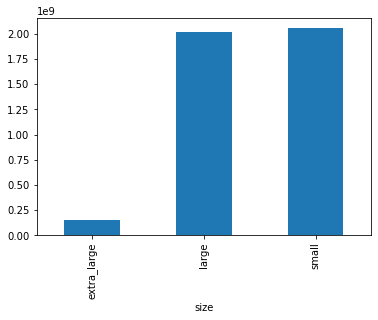

In [115]:
#get equiviliant dataset 
import urllib.request
import pickle

avocados = pd.read_pickle('avoplotto.pkl')

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()


alternatively lets data wrangle a full version of avocado csv to make the structure of the dataset the same

In [111]:
#import full csv file as pandas df
avocado1 = pd.read_csv('avocado.csv', )

#print head
print(avocado1.head())

#inspect columns
for col in avocado1.columns:
    print(col)

#CONTINUE............

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

### Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

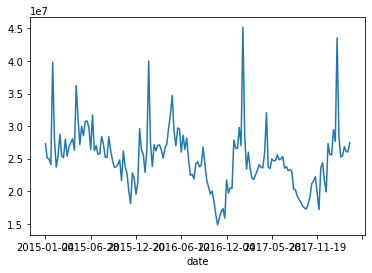

In [118]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

### Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.



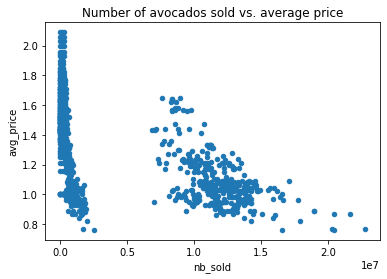

In [121]:
# Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. Title it "Number of avocados sold vs. average price".
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

### Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.



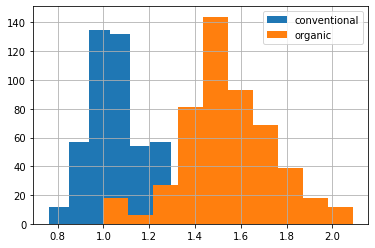

In [124]:
# Subset avocados for the conventional type, and the average price column. Create a histogram.
avocados[avocados['type']== 'conventional']['avg_price'].hist()

# Create a histogram of avg_price for organic type avocados.
avocados[avocados['type']== 'organic']['avg_price'].hist()

# Add a legend to your plot, with the names "conventional" and "organic".
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

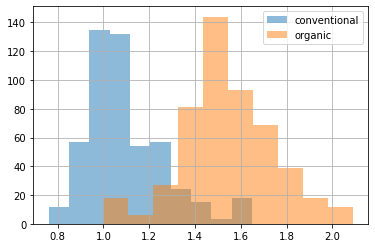

In [125]:
#Modify your code to adjust the transparency of both histograms to 0.5 to see how much overlap there is between the two distributions.
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()


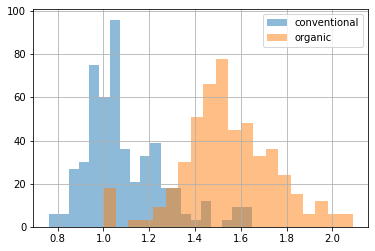

In [126]:
#Modify your code to use 20 bins in both histograms.

avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()


### Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

         avg_price  total_sold  small_sold  large_sold  xl_sold  \
date                                                              
42729.0      False       False       False       False    False   
42722.0      False       False       False       False    False   
42715.0      False       False       False        True    False   
42708.0      False       False       False       False    False   
42701.0      False       False       False       False     True   
42694.0      False       False        True       False    False   
42687.0      False       False       False       False    False   
42680.0      False       False       False        True    False   
42673.0      False       False       False       False    False   
42666.0      False       False       False       False    False   
42659.0      False       False       False        True    False   
42652.0      False       False       False       False    False   
42645.0      False       False       False       False    Fals

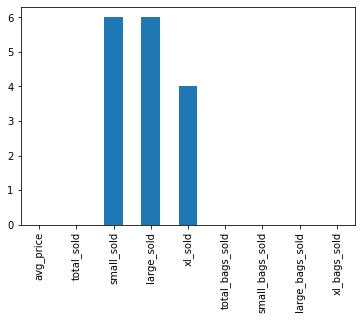

In [130]:
#import avocados_2016.csv
avocados_2016 = pd.read_csv('avocados_2016.csv', index_col = 0)

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

### Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.



In [134]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


### Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

    dogs[["height_cm", "weight_kg"]].hist()

<function matplotlib.pyplot.show(close=None, block=None)>

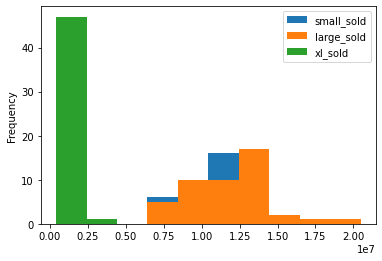

In [135]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].plot(kind='hist')

# Show the plot
plt.show()

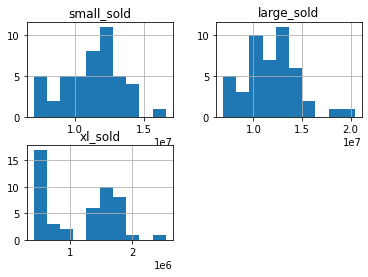

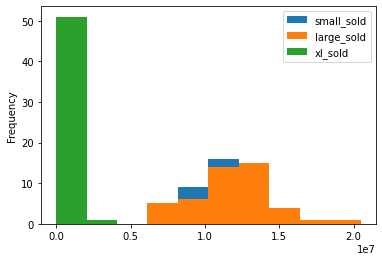

In [137]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].plot(kind='hist')

# Show the plot
plt.show()

### List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

    'date	small_sold	large_sold
    "2019-11-03"	10376832	7835071
    "2019-11-10"	10717154	8561348'
    

In [139]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


### Dictionary of lists
    date	small_sold	large_sold
    "2019-11-17"	10859987	7674135
    "2019-12-01"	9291631	6238096

In [140]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17', '2019-12-01'],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
